# 用神经网络预测线性函数的数据
但是预测结果不对，不知道是为什么

In [1]:
#导入需要使用的库
import numpy as np
import pandas as pd #读取csv文件的库
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

# 让输出的图形直接在Notebook中显示
%matplotlib inline

## 1.读取数据

In [2]:
#读取数据到内存中，rides为一个dataframe对象
# 这个数据是由此代码生成的D:\GitHub\book_DeepLearning_in_PyTorch_Source\anders-test\myc3\gen-data.py
# 此代码可以显示此数据D:\GitHub\book_DeepLearning_in_PyTorch_Source\anders-test\myc3\show-data.py
data_path = 'liner-data1.csv'
rides = pd.read_csv(data_path)

print(rides.shape)
rowCount = rides.shape[0]
#看看数据长什么样子
rides


(200, 2)


,x,y
0,1.0,9.153159
1,2.0,-10.511052
2,3.0,-1.507276
3,4.0,-31.165224
4,5.0,-5.947754
...,...,...
195,196.0,8.263368
196,197.0,10.041613
197,198.0,18.278316
198,199.0,-2.559620


## 2.将数据转成numpy数组

In [3]:
xx_arr=rides.drop(['y'], axis=1).values
# print(xx)
yy_arr=rides.drop(['x'], axis=1).values
# print(yy)
xx = torch.tensor(xx_arr/rowCount, dtype = torch.float, requires_grad = True)
yy = torch.tensor(yy_arr, dtype = torch.float, requires_grad = True)

## 2.构建神经网络

In [4]:
# 调用PyTorch现成的函数，构建序列化的神经网络
# 定义神经网络架构，1个输入层单元，1个隐含层，1个输出层
input_size = 1
hidden_size = 1
output_size = 1

# 神经网络
neu = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
)

# 损失函数
cost = torch.nn.MSELoss()
# PyTorch还自带了优化器来自动实现优化算法
optimizer = torch.optim.SGD(neu.parameters(), lr = 0.01)



## 3.训练

In [5]:

# 神经网络训练循环
losses = []

for i in range(1000):
    predict = neu(xx)
    
    loss = cost(predict, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    
    # 每隔100步输出一下损失值（loss）
    if i % 100==0:
        print(i, loss.data.numpy())
print('last:', losses[-1])


0 234.45314
100 151.82587
200 149.14755
300 144.12509
400 134.56165
500 124.23287
600 116.419304
700 111.34067
800 108.2506
900 106.42791
last: 105.374725


## 4.图形展示损失值

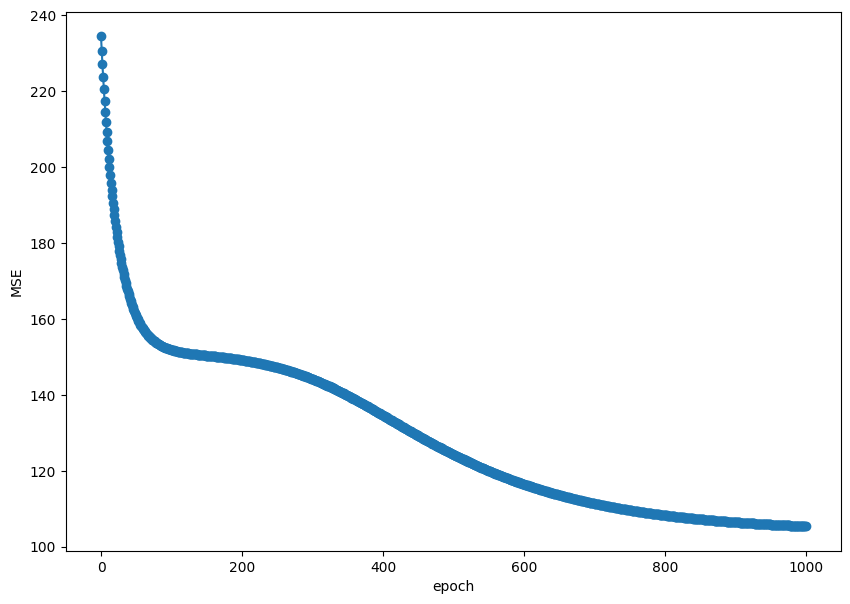

In [6]:
# 打印输出损失值
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses)),losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

## 5.画出神经网络的函数曲线

tensor([[ 2.6084],
        [ 2.6147],
        [ 2.6214],
        [ 2.6284],
        [ 2.6357],
        [ 2.6434],
        [ 2.6514],
        [ 2.6599],
        [ 2.6687],
        [ 2.6780],
        [ 2.6877],
        [ 2.6979],
        [ 2.7086],
        [ 2.7198],
        [ 2.7316],
        [ 2.7439],
        [ 2.7568],
        [ 2.7703],
        [ 2.7844],
        [ 2.7993],
        [ 2.8148],
        [ 2.8311],
        [ 2.8481],
        [ 2.8659],
        [ 2.8846],
        [ 2.9041],
        [ 2.9246],
        [ 2.9460],
        [ 2.9684],
        [ 2.9919],
        [ 3.0164],
        [ 3.0420],
        [ 3.0688],
        [ 3.0969],
        [ 3.1262],
        [ 3.1568],
        [ 3.1889],
        [ 3.2223],
        [ 3.2572],
        [ 3.2937],
        [ 3.3318],
        [ 3.3716],
        [ 3.4130],
        [ 3.4563],
        [ 3.5014],
        [ 3.5485],
        [ 3.5975],
        [ 3.6486],
        [ 3.7018],
        [ 3.7572],
        [ 3.8149],
        [ 3.8748],
        [ 3.

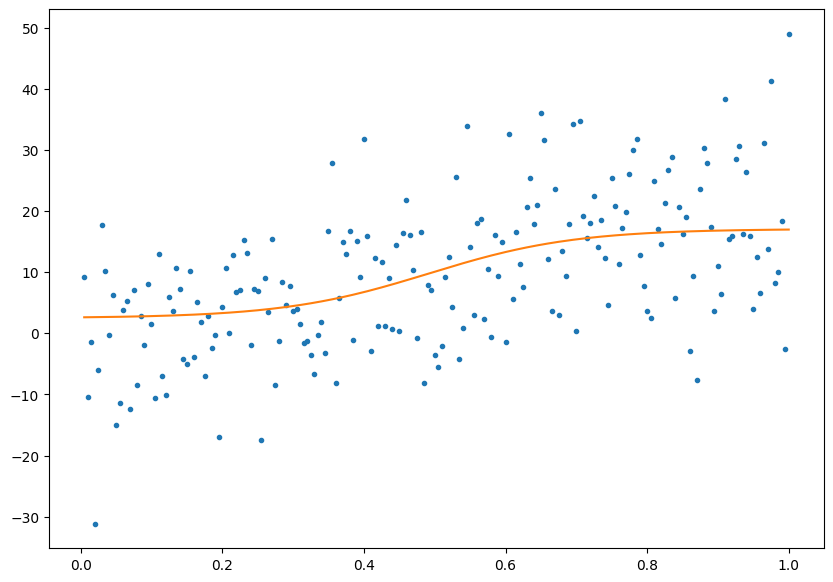

In [7]:
# 用散点表示的样本数据
targets_x = xx.data.numpy().reshape([rowCount,1]) 
targets_x = targets_x.astype(float) 
targets_y = yy.data.numpy().reshape([rowCount,1]) 
targets_y = targets_y.astype(float) 

fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(targets_x, targets_y, '.')


# 用折线表示的预测数据
predict = neu(xx)
print(predict)
predict = predict.data.numpy()
ax.plot(targets_x, predict)
